In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
%cd /content/drive/MyDrive/Assignment

/content/drive/MyDrive/Assignment


In [6]:
!ls


Assignment1.ipynb  south_asia_dataset.csv  WHR-2024-5CS037.csv


In [7]:
import numpy as np

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
df=pd.read_csv('WHR-2024-5CS037.csv')

In [10]:
#dataset overview
#1. Load the dataset and display the first 10 rows.
df.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [11]:
#2. Identify the number of rows and columns in the dataset.
print("Number of rows and columns: ",df.shape)

Number of rows and columns:  (143, 9)


In [12]:
#3. List all the columns and their data types.
print("Columns and their data types:")
print(df.dtypes)

Columns and their data types:
Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


In [13]:
#Basic statistics
#1. Calculate the mean, median, and standard deviation for the Score column.
print("Mean:",df['score'].mean())
print("Median:",df['score'].median())
print("Standard deviation:",df['score'].std())


Mean: 5.52758041958042
Median: 5.785
Standard deviation: 1.1707165099442995


In [14]:
#2. Identify the country with the highest and lowest happiness scores.
print("Country with highest happiness score:",df.loc[df['score'].idxmax()]['Country name']) #idxmax finds the index with highest score.
print("Country with lowest happiness score:",df.loc[df['score'].idxmin()]['Country name'])

Country with highest happiness score: Finland
Country with lowest happiness score: Afghanistan


In [15]:
# Missing Values:
# 1. Check if there are any missing values in the dataset. If so, display the total count for each column.
missing_values = df.isnull().sum()
print("Total count of missing values in each column:")
print(missing_values)

Total count of missing values in each column:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [16]:
# Filtering and Sorting:
# 1. Filter the dataset to show only the countries with a Score greater than 7.5.
filtered_df=df[df['score']>7.5]
print("Filtered dataset with score greater than 7.5:\n")
print(filtered_df)

Filtered dataset with score greater than 7.5:

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  


In [17]:
# 2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the top 10 rows.
sorted_df=filtered_df.sort_values(by="Log GDP per capita",ascending=False)
top_10_sorted=sorted_df.head(10)
print("Top 10 countries with highest GDP per capita:\n")
print(top_10_sorted)


Top 10 countries with highest GDP per capita:

  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


In [18]:
#• Adding New Columns:
# 1. Create a new column called Happiness Category that categorizes countries into three categories based on their Score:
def categorize_happiness(score):
    if score < 4:
        return 'Low'
    elif score <= 6:
        return 'Medium'
    else:
        return 'High'
df['Happiness Category']=df['score'].apply(categorize_happiness)
print("Dataset with new column Happiness Category:\n")
print(df[['Country name','score','Happiness Category']])



Dataset with new column Happiness Category:

         Country name  score Happiness Category
0             Finland  7.741               High
1             Denmark  7.583               High
2             Iceland  7.525               High
3              Sweden  7.344               High
4              Israel  7.341               High
..                ...    ...                ...
138  Congo (Kinshasa)  3.295                Low
139      Sierra Leone  3.245                Low
140           Lesotho  3.186                Low
141           Lebanon  2.707                Low
142       Afghanistan  1.721                Low

[143 rows x 3 columns]


<Axes: title={'center': 'Top 10 happiest countries'}, xlabel='Country name'>

<Figure size 1000x600 with 0 Axes>

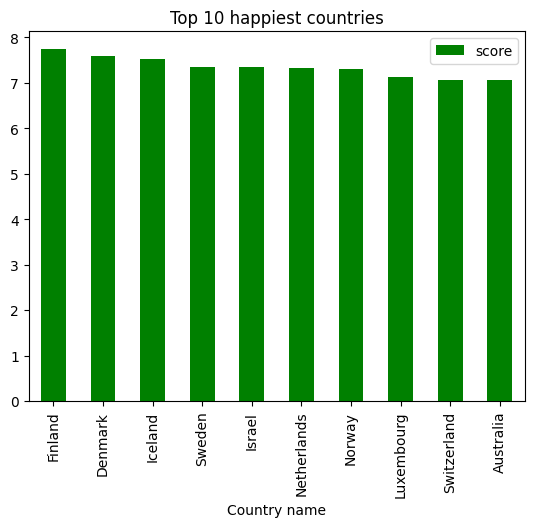

In [19]:
#2.data visualization
#• Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.
top_10_happiest=df.sort_values('score',ascending=False).head(10)

plt.figure(figsize=(10,6))
top_10_happiest.plot(kind='bar',x='Country name',y='score',color='g',title='Top 10 happiest countries')

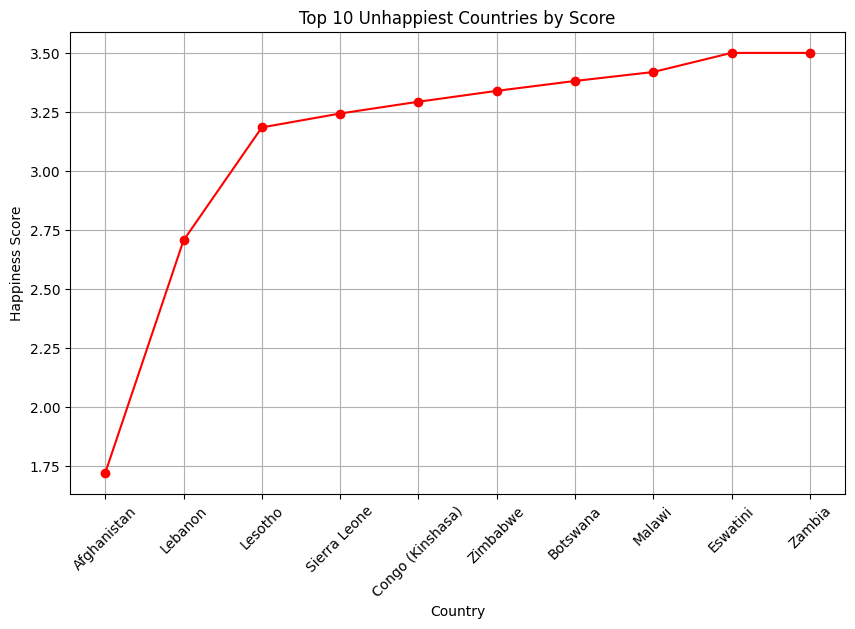

In [20]:
#Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.
top_10_unhappiest=df.sort_values('score',ascending=True).head(10)
plt.figure(figsize=(10, 6))
plt.plot(top_10_unhappiest['Country name'], top_10_unhappiest['score'], marker='o', color='red')
plt.title('Top 10 Unhappiest Countries by Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.grid()
plt.show()


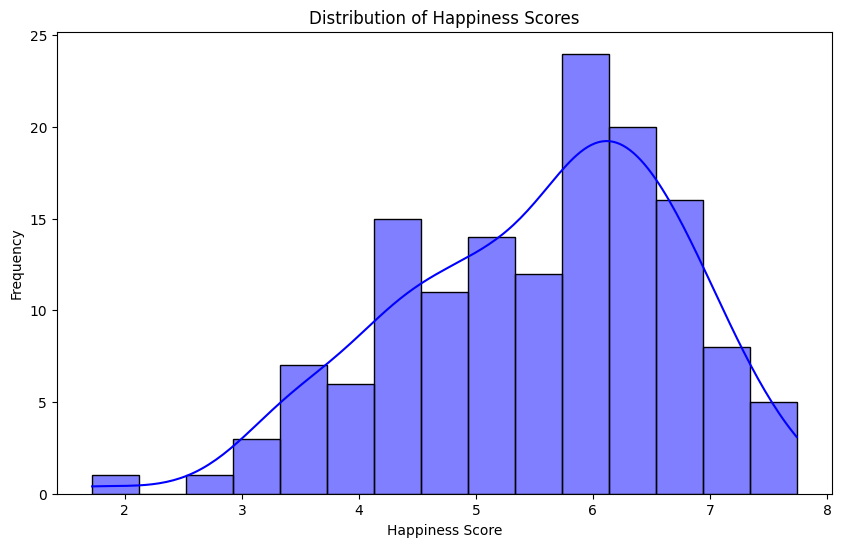


Interpretation: The histogram shows the distribution of happiness scores. For instance, you may notice whether scores are skewed, centered, or spread out, giving insights into global happiness levels.


In [21]:
#Plot a histogram for the Score column to show its distribution and also interpret.
plt.figure(figsize=(10, 6))
sns.histplot(df['score'], bins=15, kde=True, color='blue')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

# Interpretation
print("\nInterpretation: The histogram shows the distribution of happiness scores. For instance, you may notice whether scores are skewed, centered, or spread out, giving insights into global happiness levels.")


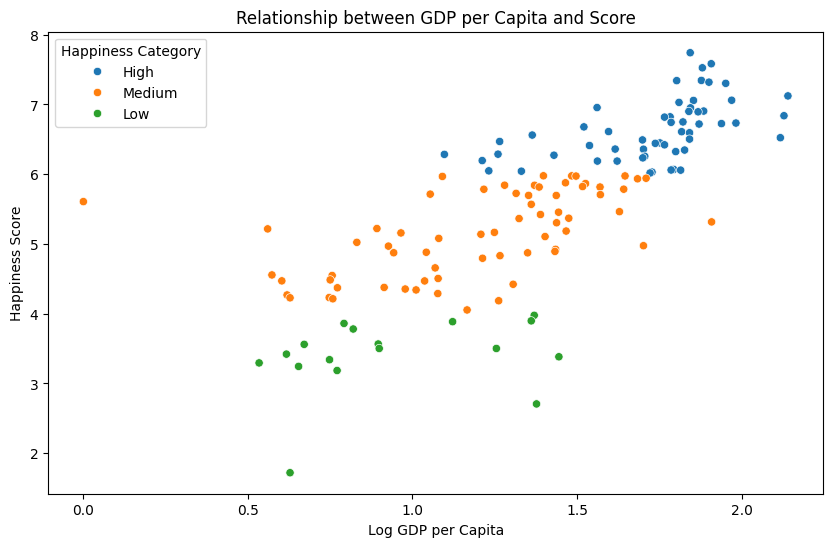

In [22]:
#• Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Log GDP per capita', y='score', hue='Happiness Category')
plt.title('Relationship between GDP per Capita and Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()


In [23]:
# Problem - 2 - Some Advance Data Exploration Task:
# Task - 1 - Setup Task - Preparing the South-Asia Dataset:
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India","Maldives", "Nepal", "Pakistan", "Srilanka"]
south_asia_df = df[df['Country name'].isin(south_asian_countries)].copy()
print(f"south Asia Dataset: \n{south_asia_df}")


south Asia Dataset: 
    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of corruption  Dystopia + residual Happiness Category  
92                       0.115                1.783             Medium  
107      

In [24]:
south_asia_df.to_csv('south_asia_dataset.csv', index=False)
print("Filtered South Asia dataset saved as 'South_Asia_Dataset.csv'.")

Filtered South Asia dataset saved as 'South_Asia_Dataset.csv'.


In [25]:
!ls

Assignment1.ipynb  south_asia_dataset.csv  WHR-2024-5CS037.csv


In [26]:
south_asia_df.head()

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low


In [27]:
# Task - 2 - Composite Score Ranking:
# Tasks:
# 1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
# following metrics:

# Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support

# + 0.30 × Healthy Life Expectancy
south_asia_df['Composite Score']=0.40*south_asia_df['Log GDP per capita']+0.30*south_asia_df['Social support']+0.30*south_asia_df['Healthy life expectancy']
print("South Asia Dataset with Composite Score:\n", south_asia_df[['Country name', 'Composite Score']])


South Asia Dataset with Composite Score:
     Country name  Composite Score
92         Nepal           0.8159
107     Pakistan           0.7039
125        India           0.7874
128   Bangladesh           0.6774
142  Afghanistan           0.3238


In [28]:
# Rank the South Asian countries based on the Composite Score in descending order.
south_asia_df=south_asia_df.sort_values(by='Composite Score',ascending=False)
print("South Asia Dataset with Composite Score:\n", south_asia_df[['Country name', 'Composite Score']])

South Asia Dataset with Composite Score:
     Country name  Composite Score
92         Nepal           0.8159
125        India           0.7874
107     Pakistan           0.7039
128   Bangladesh           0.6774
142  Afghanistan           0.3238


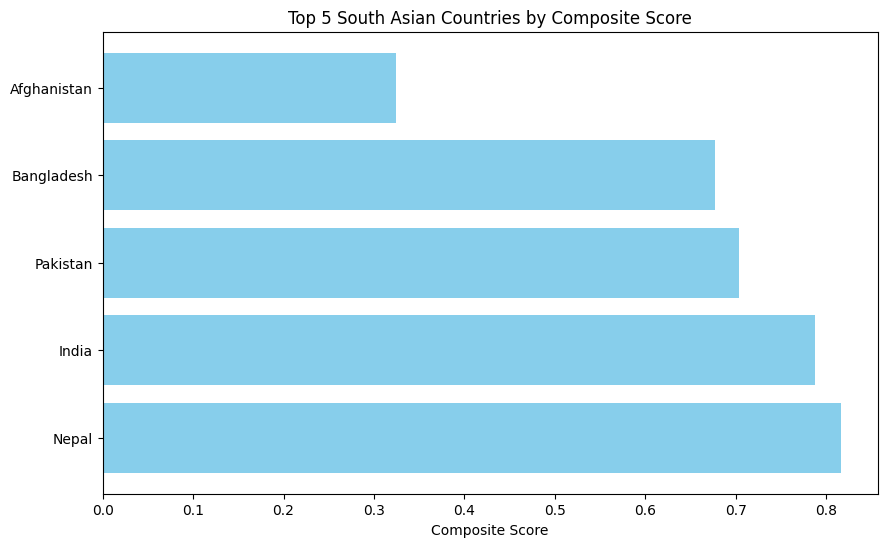

In [29]:
# Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.
top_5=south_asia_df.head(5)
plt.figure(figsize=(10,6))
plt.barh(top_5['Country name'],top_5['Composite Score'],color='skyblue')
plt.xlabel('Composite Score')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.show()

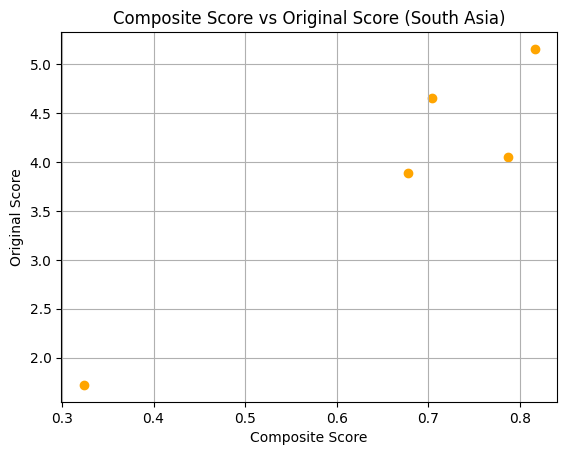

In [30]:
# Create a comparison plot between Composite Score and Original Score
plt.scatter(south_asia_df['Composite Score'], south_asia_df['score'], color='orange')
plt.xlabel('Composite Score')
plt.ylabel('Original Score')
plt.title('Composite Score vs Original Score (South Asia)')
plt.grid(True)
plt.show()

In [31]:
# Task - 3 - Outlier Detection:
# Tasks:
# 1. Identify outlier countries in South Asia based on their Score and GDP per Capita.

#calculate iqr for score
q1_score=south_asia_df['score'].quantile(0.25)
q3_score=south_asia_df['score'].quantile(0.75)
iqr_score=q3_score-q1_score

# Define outlier thresholds for Score
lower_bound_score=q1_score-1.5*iqr_score
upper_bound_score=q3_score+1.5*iqr_score

#calculate iqr for gdp per capita
q1_gdp=south_asia_df['Log GDP per capita'].quantile(0.25)
q3_gdp=south_asia_df['Log GDP per capita'].quantile(0.75)
iqr_gdp=q3_gdp-q1_gdp

# Define outlier thresholds for gdp per capita
lower_bound_gdp=q1_gdp-1.5*iqr_gdp
upper_bound_gdp=q3_gdp+1.5*iqr_gdp

# Identify outliers
south_asia_df['Outlier']=((south_asia_df['score']<lower_bound_score) | (south_asia_df['score']>upper_bound_score) |
                          (south_asia_df['Log GDP per capita']<lower_bound_gdp) | (south_asia_df['Log GDP per capita']>upper_bound_gdp)
                          )
outliers=south_asia_df[south_asia_df['Outlier']]
print("Outlier Countries in South Asia:\n",outliers[['Country name','score','Log GDP per capita']])



Outlier Countries in South Asia:
     Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628


In [32]:
print(outliers)

    Country name  score  Log GDP per capita  Social support  \
142  Afghanistan  1.721               0.628             0.0   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
142                    0.242                           0.0       0.091   

     Perceptions of corruption  Dystopia + residual Happiness Category  \
142                      0.088                0.672                Low   

     Composite Score  Outlier  
142           0.3238     True  


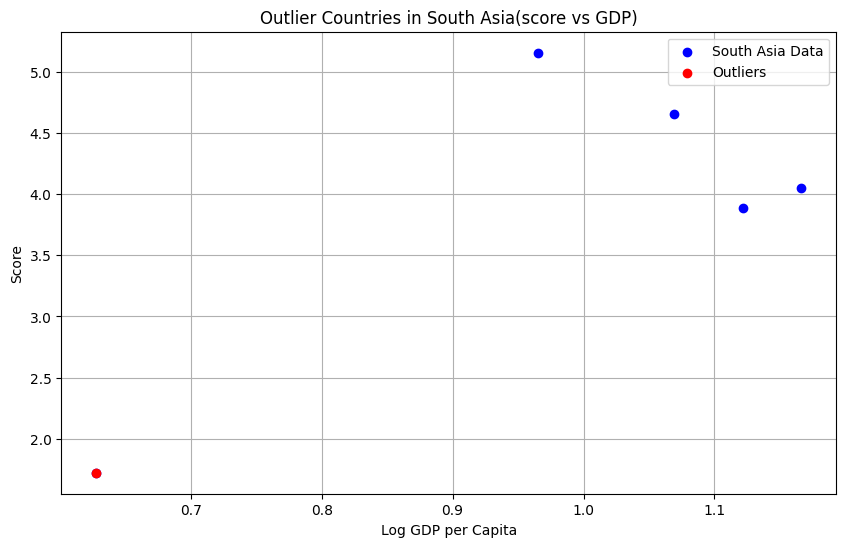

In [33]:
# Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers in a different color.
plt.figure(figsize=(10, 6))
plt.scatter(south_asia_df['Log GDP per capita'], south_asia_df['score'], color='blue', label='South Asia Data')
plt.scatter(outliers['Log GDP per capita'], outliers['score'], color='red', label='Outliers')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Score')
plt.title('Outlier Countries in South Asia(score vs GDP)')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
# Task - 4 - Exploring Trends Across Metrics:
# 1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation {pearson correlation} with the Score for South Asian countries.
correlation_freedom=south_asia_df['Freedom to make life choices'].corr(south_asia_df['score'])
correlation_generosity=south_asia_df['Generosity'].corr(south_asia_df['score'])
print(f"Correlation with Freedom to Make Life Choices: {correlation_freedom}")
print(f"Correlation with Generosity: {correlation_generosity}")

Correlation with Freedom to Make Life Choices: 0.801497903141921
Correlation with Generosity: 0.8773326267276359


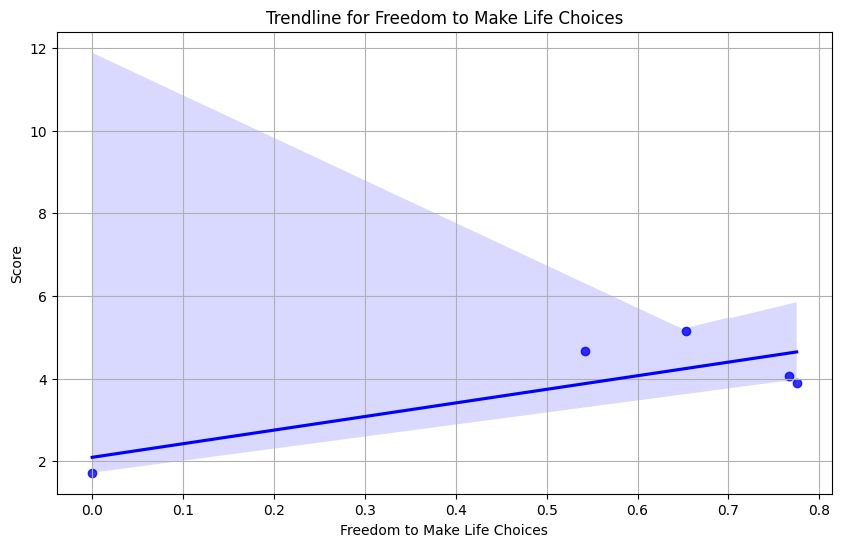

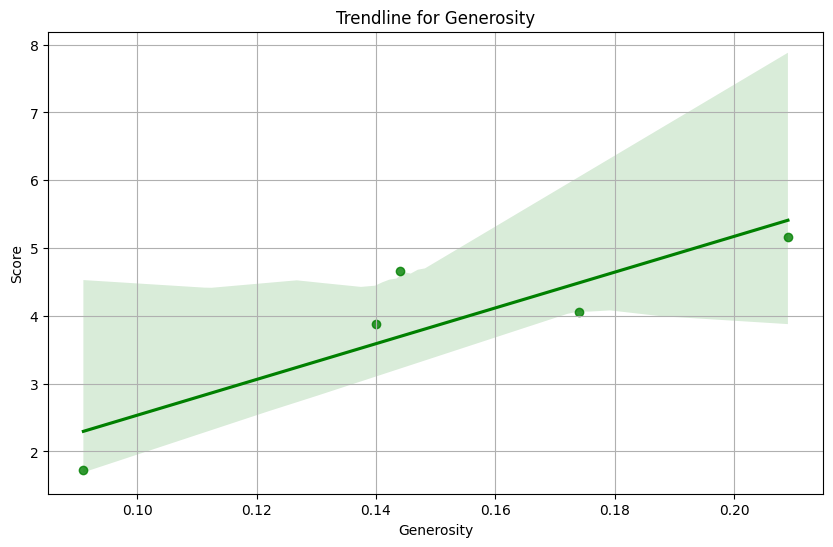

In [35]:
# 2. Create scatter plots with trendlines for these metrics against the Score.

#scatterplot for Freedom
plt.figure(figsize=(10, 6))
sns.regplot(data=south_asia_df,x="Freedom to make life choices",y="score",color='blue')
plt.title('Trendline for Freedom to Make Life Choices')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')
plt.grid()
plt.show()

#scatterplot for generosity
plt.figure(figsize=(10, 6))
sns.regplot(data=south_asia_df,x="Generosity",y="score",color='green')
plt.title('Trendline for Generosity')
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.grid()
plt.show()

In [36]:
# Task - 5 - Gap Analysis:
# Tasks:
# 1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
# for each South Asian country.
south_asia_df['GDP-Score Gap']=south_asia_df['Log GDP per capita']-south_asia_df['score']



In [37]:
# 2. Rank the South Asian countries by this gap in both ascending and descending order.
ascending_gap=south_asia_df.sort_values(by='GDP-Score Gap',ascending=True)
descending_gap=south_asia_df.sort_values(by='GDP-Score Gap',ascending=False)
print("Ascending gap:\n", ascending_gap[['Country name', 'GDP-Score Gap']])
print("\n")
print("Descending gap:\n", descending_gap[['Country name', 'GDP-Score Gap']])


Ascending gap:
     Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888
128   Bangladesh         -2.764
142  Afghanistan         -1.093


Descending gap:
     Country name  GDP-Score Gap
142  Afghanistan         -1.093
128   Bangladesh         -2.764
125        India         -2.888
107     Pakistan         -3.588
92         Nepal         -4.193


Top 3 countries with largest positive gaps:
     Country name  GDP-Score Gap
142  Afghanistan         -1.093
128   Bangladesh         -2.764
125        India         -2.888


Top 3 countries with largest negative gaps:
     Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888


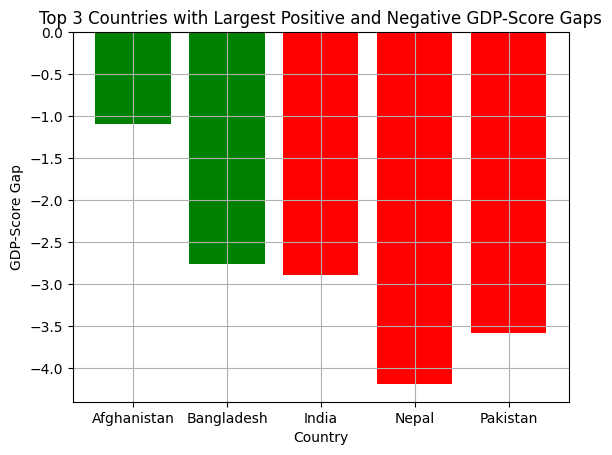

In [38]:
# 3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.
top_3_positive = descending_gap.head(3)
top_3_negative = ascending_gap.head(3)

print("Top 3 countries with largest positive gaps:\n", top_3_positive[['Country name', 'GDP-Score Gap']])
print("\n")
print("Top 3 countries with largest negative gaps:\n", top_3_negative[['Country name', 'GDP-Score Gap']])

# Combine the top 3 positive and negative gaps for the bar chart
gap_data = pd.concat([top_3_positive, top_3_negative])
plt.bar(gap_data["Country name"], gap_data["GDP-Score Gap"], color=["green"] * 3 + ["red"] *3)
plt.title('Top 3 Countries with Largest Positive and Negative GDP-Score Gaps')
plt.xlabel('Country')
plt.ylabel('GDP-Score Gap')
plt.grid(True)
plt.show()



In [45]:
# 3.3 Problem - 3 - Comparative Analysis:
# Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:
# Tasks:
# 1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
# following list:
middle_eastern_countries = ["Algeria", "Bahrain", "Egypt", "Iraq", "Jordan", "Kuwait", "Lebanon", "Oman", "Qatar", "Saudi Arabia", "Syria", "Tunisia", "United Arab Emirates"]
middle_eastern_df = df[df['Country name'].isin(middle_eastern_countries)].copy()
print(f"Middle Eastern Dataset: \n{middle_eastern_df}")



Middle Eastern Dataset: 
             Country name  score  Log GDP per capita  Social support  \
12                 Kuwait  6.951               1.845           1.364   
21   United Arab Emirates  6.733               1.983           1.164   
27           Saudi Arabia  6.594               1.842           1.361   
61                Bahrain  5.959                 NaN             NaN   
84                Algeria  5.364               1.324           1.191   
91                   Iraq  5.166               1.249           0.996   
114               Tunisia  4.422               1.306           0.955   
124                Jordan  4.186               1.262           0.983   
126                 Egypt  3.977               1.370           0.996   
141               Lebanon  2.707               1.377           0.577   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
12                     0.661                         0.827       0.200   
21                     0.563      

In [46]:
middle_eastern_df.head()

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
12,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884,High
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741,High
27,Saudi Arabia,6.594,1.842,1.361,0.511,0.787,0.114,0.188,1.790,High
61,Bahrain,5.959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium
84,Algeria,5.364,1.324,1.191,0.568,0.247,0.091,0.200,1.743,Medium


In [47]:
middle_eastern_df.to_csv('MiddleEast.csv',index=False)
print("Filtered middle east dataset saved as 'MiddleEast.csv'.")



Filtered middle east dataset saved as 'MiddleEast.csv'.


In [48]:
!ls

Assignment1.ipynb  MiddleEast.csv  south_asia_dataset.csv  WHR-2024-5CS037.csv


In [51]:
# 1. Descriptive Statistics:
# • Calculate the mean, Standard deviation of the score for both South Asia and Middle East.
sa_mean=south_asia_df['score'].mean()
sa_sd=south_asia_df['score'].std()
me_mean=middle_eastern_df['score'].mean()
me_sd=middle_eastern_df['score'].std()
print(f"Mean and Standard Deviation for South Asia:\nMean: {sa_mean}\nStandard Deviation: {sa_sd}")
print(f"Mean and Standard Deviation for Middle East:\nMean: {me_mean}\nStandard Deviation: {me_sd}")

if(sa_mean>me_mean):
  print("South Asia has higher happiness score on average.")
else:
  print("Middle East has higher happiness score on average.")

Mean and Standard Deviation for South Asia:
Mean: 3.8952
Standard Deviation: 1.3160025455902433
Mean and Standard Deviation for Middle East:
Mean: 5.2059
Standard Deviation: 1.3867375342467978
Middle East has higher happiness score on average.


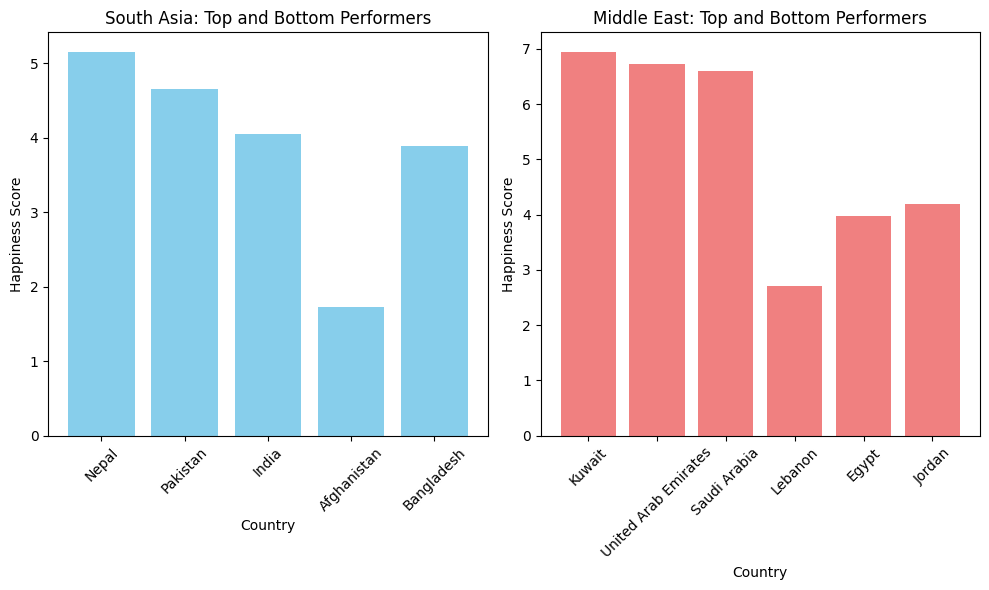

In [73]:
# 2. Top and Bottom Performers:
# • Identify the top 3 and bottom 3 countries in each region based on the score.
# • Plot bar charts comparing these charts.

top_3_sa=south_asia_df.nlargest(3,'score')
bottom_3_sa=south_asia_df.nsmallest(3,'score')
top_3_me=middle_eastern_df.nlargest(3,'score')
bottom_3_me=middle_eastern_df.nsmallest(3,'score')

sa_combined=pd.concat([top_3_sa,bottom_3_sa])
me_combined=pd.concat([top_3_me,bottom_3_me])

plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.bar(sa_combined['Country name'],sa_combined['score'],color='skyblue')
plt.title("South Asia: Top and Bottom Performers")
plt.xlabel("Country")
plt.ylabel("Happiness Score")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(me_combined['Country name'], me_combined['score'], color='lightcoral')
plt.title("Middle East: Top and Bottom Performers")
plt.xlabel("Country")
plt.ylabel("Happiness Score")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

                         South Asia  Middle East
Log GDP per capita           0.9900     1.506444
Social support               0.4984     1.065222
Healthy life expectancy      0.3872     0.557556


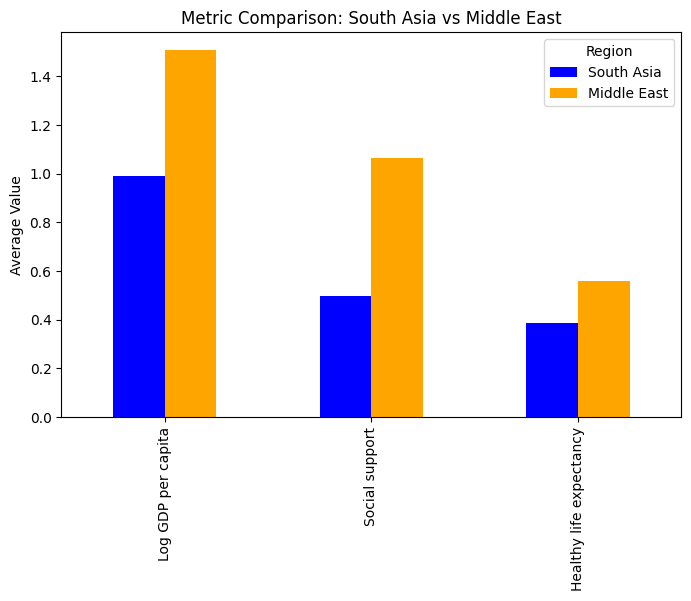


The largest disparity is in the metric: Social support
Disparity value: 0.57


In [86]:
# 3. Metric Comparisons:
# • Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
# between the regions using grouped bar charts.
# • Which metrics show the largest disparity between the two regions?
metrics = ["Log GDP per capita", "Social support", "Healthy life expectancy"]
south_asia_means=south_asia_df[metrics].mean()
middle_east_means=middle_eastern_df[metrics].mean()
# Create a DataFrame for comparison
comparison_df=pd.DataFrame({'South Asia':south_asia_means,'Middle East':middle_east_means})
print(comparison_df)

comparison_df.plot(kind='bar',figsize=(8,5),color=['blue','orange'])
plt.title('Metric Comparison: South Asia vs Middle East')
plt.ylabel("Average Value")
plt.legend(title="Region")
plt.show()

disparities=middle_east_means-south_asia_means
largest_disparity_metric=disparities.idxmax()
print(f"\nThe largest disparity is in the metric: {largest_disparity_metric}")
print(f"Disparity value: {disparities[largest_disparity_metric]:.2f}")

In [92]:
# 4. Happiness Disparity:
# • Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.
# • Which region has greater variability in happiness?
south_asia_range = south_asia_df['score'].max() - south_asia_df['score'].min()
middle_east_range = middle_eastern_df['score'].max() - middle_eastern_df['score'].min()

south_asia_cv=south_asia_df['score'].std() / south_asia_df['score'].mean()
middle_east_cv=middle_eastern_df['score'].std() / middle_eastern_df['score'].mean()

print(f"South Asia - Range: {south_asia_range:.2f}, CV: {south_asia_cv:.2f}")
print(f"Middle East - Range: {middle_east_range:.2f}, CV: {middle_east_cv:.2f}")

if south_asia_range > middle_east_range:
    print("South Asia has a greater variability in happiness.")
else:
    print("Middle East has a greater variability in happiness.")


South Asia - Range: 3.44, CV: 0.34
Middle East - Range: 4.24, CV: 0.27
Middle East has a greater variability in happiness.


In [95]:
# 5. Correlation Analysis:
# • Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
# Generosity within each region.
# • Create scatter plots to visualize and interpret the relationships.

sa_corr_freedom=south_asia_df['score'].corr(south_asia_df['Freedom to make life choices'])
sa_corr_generosity=south_asia_df['score'].corr(south_asia_df['Generosity'])

me_corr_freedom=middle_eastern_df['score'].corr(middle_eastern_df['Freedom to make life choices'])
me_corr_generosity=middle_eastern_df['score'].corr(middle_eastern_df['Generosity'])

print("South Asia Correlations:")
print(f"Score vs Freedom to Make Life Choices: {sa_corr_freedom:.2f}")
print(f"Score vs Generosity: {sa_corr_generosity:.2f}\n")

print("Middle East Correlations:")
print(f"Score vs Freedom to Make Life Choices: {me_corr_freedom:.2f}")
print(f"Score vs Generosity: {me_corr_generosity:.2f}\n")



South Asia Correlations:
Score vs Freedom to Make Life Choices: 0.80
Score vs Generosity: 0.88

Middle East Correlations:
Score vs Freedom to Make Life Choices: 0.79
Score vs Generosity: 0.80



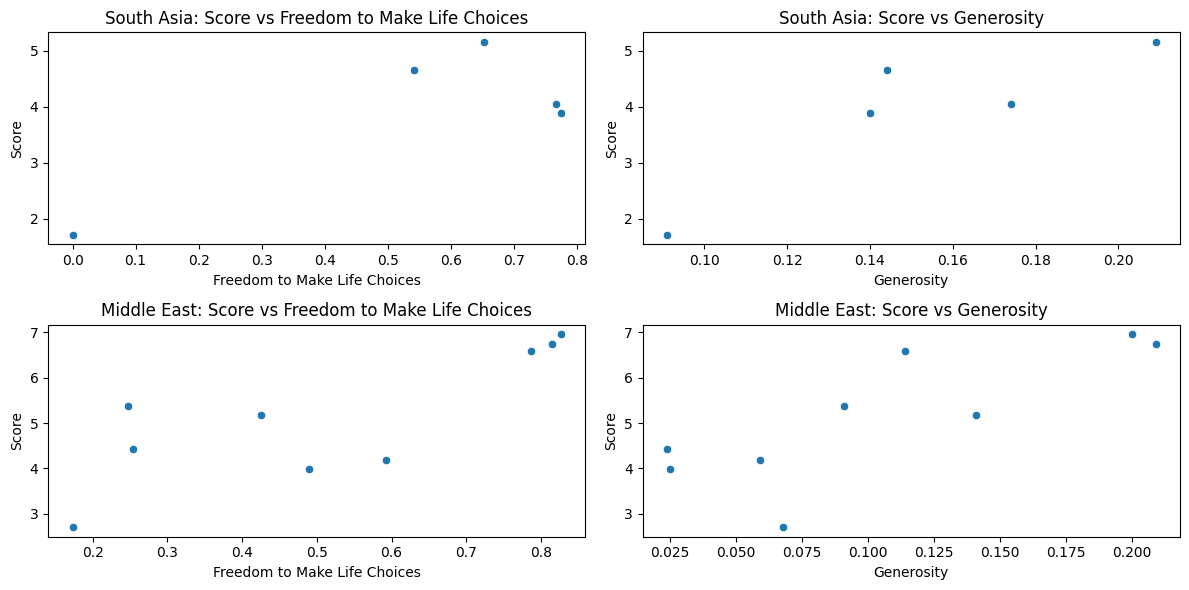

In [100]:
# scatterplot
plt.figure(figsize=(12, 6))

# South Asia: Score vs Freedom
plt.subplot(2, 2, 1)
sns.scatterplot(x=south_asia_df['Freedom to make life choices'], y=south_asia_df['score'])
plt.title('South Asia: Score vs Freedom to Make Life Choices')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')

# South Asia: Score vs Generosity
plt.subplot(2, 2, 2)
sns.scatterplot(x=south_asia_df['Generosity'], y=south_asia_df['score'])
plt.title('South Asia: Score vs Generosity')
plt.xlabel('Generosity')
plt.ylabel('Score')

# Middle East: Score vs Freedom
plt.subplot(2, 2, 3)
sns.scatterplot(x=middle_eastern_df['Freedom to make life choices'], y=middle_eastern_df['score'])
plt.title('Middle East: Score vs Freedom to Make Life Choices')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')

# Middle East: Score vs Generosity
plt.subplot(2, 2, 4)
sns.scatterplot(x=middle_eastern_df['Generosity'], y=middle_eastern_df['score'])
plt.title('Middle East: Score vs Generosity')
plt.xlabel('Generosity')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

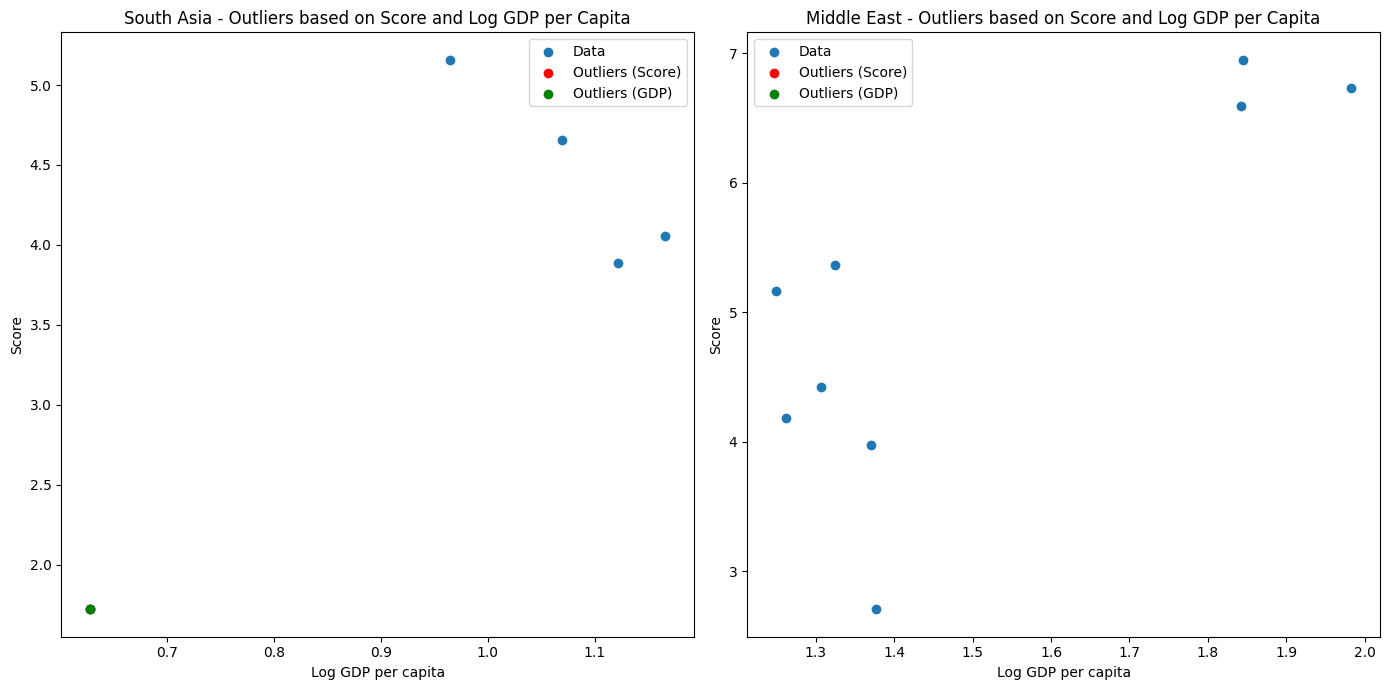

South Asia Score Outliers:
    Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628

South Asia GDP per Capita Outliers:
    Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628

Middle East Score Outliers:
Empty DataFrame
Columns: [Country name, score, Log GDP per capita]
Index: []

Middle East GDP per Capita Outliers:
Empty DataFrame
Columns: [Country name, score, Log GDP per capita]
Index: []


In [125]:
# 6. Outlier Detection:
# • Identify outlier countries in both regions based on Score and GDP per Capita.
# • Plot these outliers and discuss their implications.

def detect_outlier(df,colm):
  q1=df[colm].quantile(0.25)
  q3=df[colm].quantile(0.75)
  IQR=q3-q1
  lower_bound=q1-1.5*IQR
  upper_bound=q3+1.5*IQR
  outliers=df[(df[colm]<lower_bound)|(df[colm]>upper_bound)]
  return outliers

sa_score_outliers=detect_outlier(south_asia_df,'score')
sa_gdp_outliers=detect_outlier(south_asia_df,'Log GDP per capita')
me_score_outliers=detect_outlier(middle_eastern_df,'score')
me_gdp_outliers=detect_outlier(middle_eastern_df,'Log GDP per capita')



plt.figure(figsize=(14, 7))

# South Asia
plt.subplot(1, 2, 1)
plt.scatter(south_asia_df['Log GDP per capita'], south_asia_df['score'], label='Data')
plt.scatter(sa_score_outliers['Log GDP per capita'], sa_score_outliers['score'], color='red', label='Outliers (Score)')
plt.scatter(sa_gdp_outliers['Log GDP per capita'], sa_gdp_outliers['score'], color='green', label='Outliers (GDP)')
plt.title('South Asia - Outliers based on Score and Log GDP per Capita')
plt.xlabel('Log GDP per capita')
plt.ylabel('Score')
plt.legend()

# Middle East
plt.subplot(1, 2, 2)
plt.scatter(middle_eastern_df['Log GDP per capita'], middle_eastern_df['score'], label='Data')
plt.scatter(me_score_outliers['Log GDP per capita'], me_score_outliers['score'], color='red', label='Outliers (Score)')
plt.scatter(me_gdp_outliers['Log GDP per capita'], me_gdp_outliers['score'], color='green', label='Outliers (GDP)')
plt.title('Middle East - Outliers based on Score and Log GDP per Capita')
plt.xlabel('Log GDP per capita')
plt.ylabel('Score')
plt.legend()


plt.tight_layout()
plt.show()

print("South Asia Score Outliers:")
print(sa_score_outliers[['Country name', 'score', 'Log GDP per capita']])

print("\nSouth Asia GDP per Capita Outliers:")
print(sa_gdp_outliers[['Country name', 'score', 'Log GDP per capita']])

print("\nMiddle East Score Outliers:")
print(me_score_outliers[['Country name', 'score', 'Log GDP per capita']])

print("\nMiddle East GDP per Capita Outliers:")
print(me_gdp_outliers[['Country name', 'score', 'Log GDP per capita']])

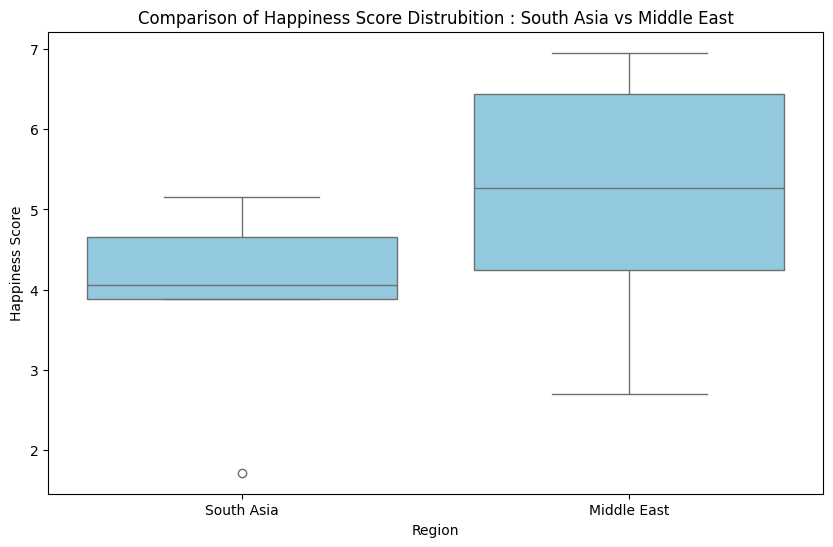

In [133]:
# 7. Visualization:
# • Create boxplots comparing the distribution of Score between South Asia and the Middle East.
# • Interpret the key differences in distribution shapes, medians, and outliers.
# Combine both datasets for visualization
south_asia_df['Region']='South Asia'
middle_eastern_df['Region']='Middle East'

combined_df=pd.concat([south_asia_df[['score','Region']],middle_eastern_df[['score','Region']]])

plt.figure(figsize=(10,6))
sns.boxplot(data=combined_df,x='Region',y='score',color='skyblue')
plt.title('Comparison of Happiness Score Distrubition : South Asia vs Middle East')
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.show()